In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cmdstanpy
import numpy as np
import cmdstanpy
cmdstanpy.install_cmdstan(compiler=True)
import os

12:42:37 - cmdstanpy - INFO - Add C++ toolchain to $PATH: C:\Users\dimot\.cmdstan\RTools40


CmdStan install directory: C:\Users\dimot\.cmdstan
CmdStan version 2.36.0 already installed
Test model compilation


In [3]:
with open('data/simulated/data.pkl', "rb") as f:  # Python 3: open(..., 'rb')
    sujetos, delitos = pickle.load(f)

# One-hot para las variables categoricas de los nodos
df_sujetos = pd.DataFrame.from_dict(sujetos, orient="index")
sdummies = pd.get_dummies(df_sujetos["comuna"], dtype=int, drop_first=True)
df_sujetos = pd.concat([df_sujetos, sdummies], axis=1)
df_sujetos.drop(columns="comuna", inplace=True)
sujetos = df_sujetos.to_dict(orient="index")

# One-hot para las variables categoricas de los enlaces
attr_delitos = {i:delitos[i][1] for i in delitos.keys()}
nodes_delitos = {i:delitos[i][0] for i in delitos.keys()}

df_delitos = pd.DataFrame.from_dict(attr_delitos, orient="index")
cat_cols = ["lugar"]
for col in cat_cols:
    ddummies = pd.get_dummies(df_delitos[col], dtype=int, drop_first=True)
    df_delitos = pd.concat([df_delitos, ddummies], axis=1)
    df_delitos.drop(columns=col, inplace=True)
df_delitos["tipo_id"] = df_delitos["tipo"].factorize()[0]+1
attr_delitos = df_delitos.to_dict(orient="index")


[[16, 1],
 [15, 1],
 [18, 1],
 [17, 1],
 [25, 0],
 [30, 0],
 [37, 0],
 [23, 1],
 [25, 1],
 [20, 1]]

In [8]:
categorical = ["comuna"]
non_categorical = ["edad"]

y = []
u = []
w = []
i = []
j = []

for delito in attr_delitos.keys():
    S = nodes_delitos[delito]
    for sujeto in sujetos.keys():

        if sujeto in S: y_ = 1 
        else: y_ = 0
        
        u_ = list(sujetos[sujeto].values())
        w_ = list(attr_delitos[delito].values())[1:-1]
        i_ = sujeto
        j_ = attr_delitos[delito]["tipo_id"]

        y.append(y_)
        u.append(u_)
        w.append(w_)
        i.append(i_)
        j.append(j_)


N = len(y)
U = len(u[0])
W = len(w[0])
I = len(sujetos)
J = len(pd.unique(np.array(j)))
x = [list(sujetos[i].values()) for i in sujetos.keys()]

cmdstanpy.write_stan_json("stan_models/simulated_data.json", {"N":N, "U":U, "W":W, "I":I, "J":J, "u":u, "x":x, "w":w, "i":i, "j":j, "y":y})

In [9]:
stan_model = cmdstanpy.CmdStanModel(stan_file=os.path.join("stan_models",'logit.stan'), force_compile=True)

fit = stan_model.sample(
    data="stan_models/simulated_data.json",
    chains=4,
    iter_sampling=1000,
    iter_warmup=500, 
    seed=12345, show_console=True
)

12:46:11 - cmdstanpy - INFO - compiling stan file C:\Users\dimot\Documents\Universidad\tesis\tesis\stan_models\logit.stan to exe file C:\Users\dimot\Documents\Universidad\tesis\tesis\stan_models\logit.exe
12:46:36 - cmdstanpy - INFO - compiled model executable: C:\Users\dimot\Documents\Universidad\tesis\tesis\stan_models\logit.exe
12:46:36 - cmdstanpy - INFO - Chain [1] start processing
12:46:36 - cmdstanpy - INFO - Chain [2] start processing
12:46:36 - cmdstanpy - INFO - Chain [3] start processing
12:46:36 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 500
Chain [1] save_warmup = false (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = true (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = false (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = stan_models/simulated_data.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] seed = 12345
Chain [1] output

12:46:56 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] Iteration: 1500 / 1500 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 15.076 seconds (Warm-up)
Chain [1] 4.343 seconds (Sampling)
Chain [1] 19.419 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [3] Iteration: 1400 / 1500 [ 93%]  (Sampling)


12:46:56 - cmdstanpy - INFO - Chain [4] done processing


Chain [4] Iteration: 1500 / 1500 [100%]  (Sampling)
Chain [2] Iteration: 1400 / 1500 [ 93%]  (Sampling)
Chain [4] 
Chain [4] Elapsed Time: 15.605 seconds (Warm-up)
Chain [4] 4.08 seconds (Sampling)
Chain [4] 19.685 seconds (Total)
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 


12:46:57 - cmdstanpy - INFO - Chain [3] done processing
12:46:57 - cmdstanpy - INFO - Chain [2] done processing


Chain [3] Iteration: 1500 / 1500 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 14.951 seconds (Warm-up)
Chain [3] 4.972 seconds (Sampling)
Chain [3] 19.923 seconds (Total)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [2] Iteration: 1500 / 1500 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 15.535 seconds (Warm-up)
Chain [2] 4.484 seconds (Sampling)
Chain [2] 20.019 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Ch

In [11]:
print(fit.diagnose())

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

Rank-normalized split R-hat values satisfactory for all parameters.

Processing complete, no problems detected.



In [ ]:
fit.save_csvfiles("stan_models/fitted_logit")

In [13]:
causa_estudiada = [1,0,0,0] # violencia, encerrona, la pintana
w_new = I * [causa_estudiada]
u_new = []
i_new = []
j_new = I * [1]
for s in sujetos.keys():
    u_new.append(list(sujetos[s].values()))
    i_new.append(s)

cmdstanpy.write_stan_json("stan_models/simulated_data_new.json", {"N":N, "U":U, "W":W, "I":I, "J":J, "u":u, "x":x, "w":w, "i":i, "j":j, "y":y, "N_new":I, "i_new":i_new, "j_new":j_new, "u_new":u_new, "w_new":w_new})

In [14]:
bernoulli_ppc_model = cmdstanpy.CmdStanModel(stan_file='stan_models/logit_ppc.stan')
new_quantities = bernoulli_ppc_model.generate_quantities(data="stan_models/simulated_data_new.json", mcmc_sample=fit)

12:49:39 - cmdstanpy - INFO - compiling stan file C:\Users\dimot\Documents\Universidad\tesis\tesis\stan_models\logit_ppc.stan to exe file C:\Users\dimot\Documents\Universidad\tesis\tesis\stan_models\logit_ppc.exe
12:50:03 - cmdstanpy - INFO - compiled model executable: C:\Users\dimot\Documents\Universidad\tesis\tesis\stan_models\logit_ppc.exe
12:50:03 - cmdstanpy - WARNING - Argument name `mcmc_sample` is deprecated, please rename to `previous_fit`.
12:50:03 - cmdstanpy - INFO - Chain [1] start processing
12:50:03 - cmdstanpy - INFO - Chain [2] start processing
12:50:03 - cmdstanpy - INFO - Chain [3] start processing
12:50:03 - cmdstanpy - INFO - Chain [4] start processing
12:50:04 - cmdstanpy - INFO - Chain [3] done processing
12:50:04 - cmdstanpy - INFO - Chain [2] done processing
12:50:04 - cmdstanpy - INFO - Chain [4] done processing
12:50:04 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
new_quantities.theta_sim.T[4].mean()

np.float64(0.1461269756675)

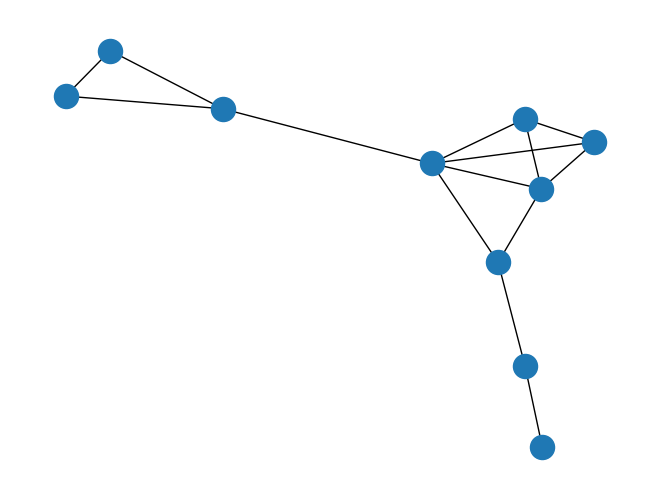

In [15]:
import networkx as nx
edges = []
for d in nodes_delitos.keys():
    nodes = nodes_delitos[d]
    for node1 in nodes:
        for node2 in nodes:
            if node1 != node2:
                edges.append((node1, node2))
G = nx.from_edgelist(edges)
nx.draw(G)

In [16]:
p_sujeto = {}
r_sujeto = {}
u_sujeto = {}
ps = []
rs = []
us = []
for s in sujetos.keys():
    p_sujeto[s] = {"p":new_quantities.y_sim.T[s-1].mean()}
    r_sujeto[s] = {"r":np.diff(np.percentile(new_quantities.theta_sim.T[s-1], q=(5,95)))[0]}
    u_sujeto[s] = {"u":np.diff(np.percentile(new_quantities.u_sim.T[s-1], q=(5,95)))[0]}
    ps.append(new_quantities.y_sim.T[s-1].mean())
    rs.append(np.diff(np.percentile(new_quantities.theta_sim.T[s-1], q=(5,95)))[0])
    us.append(np.diff(np.percentile(new_quantities.u_sim.T[s-1], q=(5,95)))[0])

nx.set_node_attributes(G, p_sujeto)
nx.set_node_attributes(G, r_sujeto)
nx.set_node_attributes(G, u_sujeto)

Probabilidad míninma: 0.02325 & Probabilidad máxima: 0.63875
Rango de probabilidad míninmo: 0.08050030699999991 & Rango de probabilidad máximo: 0.3971981499999999


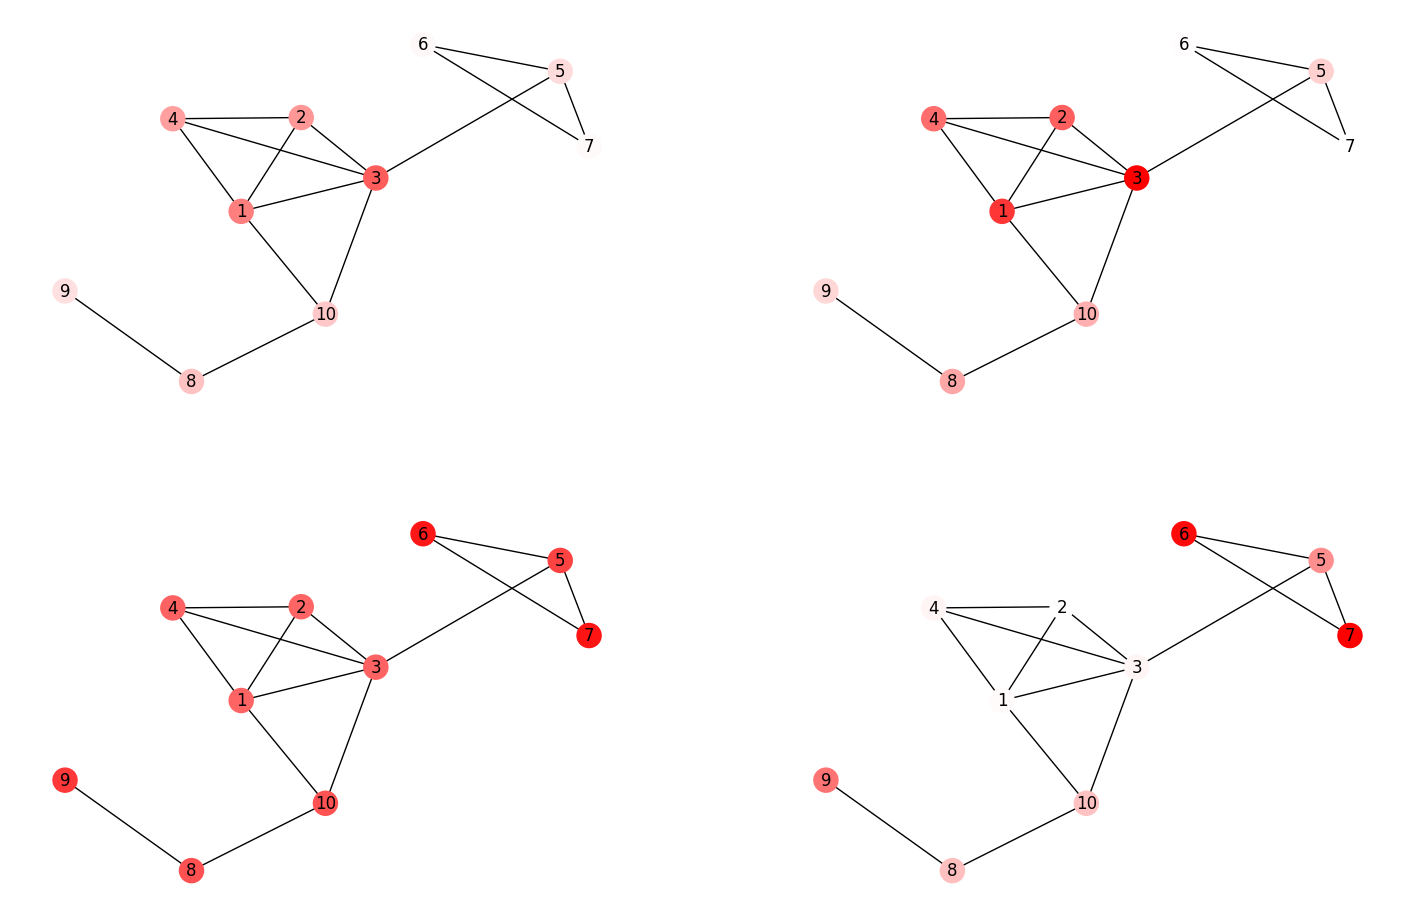

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable

# Crear colormap blanco → rojo
white_red = LinearSegmentedColormap.from_list("white_red", ["white", "red"])
red_white = LinearSegmentedColormap.from_list("red_white", ["red", "white"])
p_values = [G.nodes[n]["p"] for n in G.nodes]
r_values = [G.nodes[n]["r"] for n in G.nodes]
u_values = [G.nodes[n]["u"] for n in G.nodes]
pos = nx.spring_layout(G, k=2, iterations=100, seed=42)
plt.figure(figsize=(18,18))
plt.subplot(321)
nx.draw(
    G,
    node_color=p_values,
    cmap=white_red,     # azul-blanco-rojo
    vmin=0, vmax=1,      # escala entre 0 y 1
    with_labels=True,
    pos=pos
)
plt.subplot(322)
nx.draw(
    G,
    node_color=p_values,
    cmap=white_red,     # azul-blanco-rojo
    vmin=min(p_values), vmax=max(p_values),      # escala entre 0 y 1
    with_labels=True,
    pos=pos
)

plt.subplot(323)
nx.draw(
    G,
    node_color=r_values,
    cmap=red_white,     # azul-blanco-rojo
    vmin=0, vmax=1,      # escala entre 0 y 1
    with_labels=True,
    pos=pos
)

plt.subplot(324)
nx.draw(
    G,
    node_color=r_values,
    cmap=red_white,     # azul-blanco-rojo
    vmin=min(r_values), vmax=max(r_values),      # escala entre 0 y 1
    with_labels=True,
    pos=pos
)
print("Probabilidad míninma: " + str(min(p_values)) + " & Probabilidad máxima: " + str(max(p_values)))
print("Rango de probabilidad míninmo: " + str(min(r_values)) + " & Rango de probabilidad máximo: " + str(max(r_values)))
plt.show()




<Axes: ylabel='Count'>

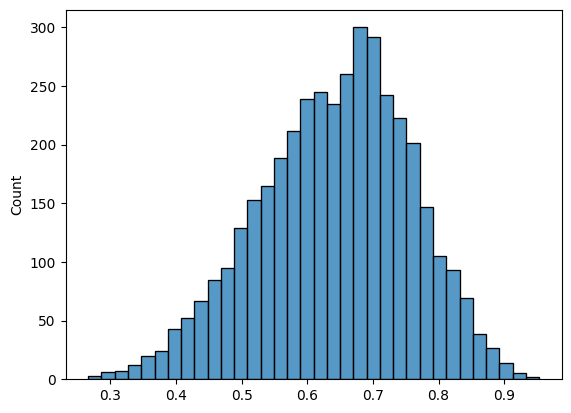

In [22]:
sns.histplot(new_quantities.theta_sim.T[2])